In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# [Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/)

## Data Prep
Ref: https://github.com/hzitoun/datacamp-machine-learning-with-scikit-learn/blob/master/3_Linear%20Classifiers%20in%20Python/linear_classifiers_in_python.ipynb

In [2]:
import os
import glob
from sklearn.utils import shuffle

In [3]:
def loadTxtFile(filePath) : 
    with open(filePath, 'r', encoding='utf-8') as f:
        text = f.readlines()
        return "".join(text).replace('<br />', '').replace('<br/>', '').strip()
#         return text
    
def concatFiles(path):
    allFiles = glob.glob(os.path.join(path, "*.txt"))
    return [loadTxtFile(filePath) for filePath in allFiles]

In [37]:
posPath_train = './data_movie/train/pos_' 
negPath_train = './data_movie/train/neg_'
posList_train = concatFiles(posPath_train)
negList_train = concatFiles(negPath_train)

reviews_train = posList_train
reviews_train.extend(negList_train)

len(reviews_train)

2000

In [38]:
posPath_test = './data_movie/test/pos_' 
negPath_test = './data_movie/test/neg_'
posList_test = concatFiles(posPath_test)
negList_test = concatFiles(negPath_test)

reviews_test = posList_test
reviews_test.extend(negList_test)

len(reviews_test)

2000

In [39]:
(reviews_train[0])

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [40]:
reviews_test[0]

"I was fortunate to attend the London premier of this film. While I am not at all a fan of British drama, I did find myself deeply moved by the characters and the BAD CHOICES they made. I was in tears by the end of the film. Every scene was mesmerizing. The attention to detail and the excellent acting was quite impressive.I would have to agree with some of the other comments here which question why all these women were throwing themselves at such a despicable character.*******SPOLIER ALERT******** I was also hoping that Dylan would have been killed by William when he had the chance! ****END SPOILER*****Keira Knightley did a great job and radiate beauty and innocence from the screen, but it was Sienna Miller's performance that was truly Oscar worthy.I am sure this production will be nominated for other awards."

In [41]:
y_train = [1 for x in range(1000)] # output/targets
y_train.extend([-1 for x in range(1000)])

len(y_train)

2000

In [42]:
y_test = [1 for x in range(1000)] # output/targets
y_test.extend([-1 for x in range(1000)])

len(y_test)

2000

In [43]:
# Shuffle data
reviews_train, y_train= shuffle(reviews_train, y_train, random_state=42)
reviews_test, y_test= shuffle(reviews_test, y_test, random_state=84)

In [44]:
# I don't think they used TfidfVectorizer here since the values in the sparse matrix aren't [0, 1]
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
# load vocab
vocabulary = (pd.read_csv('./data_movie/imdb.vocab', header=None, keep_default_na=False).values.flatten())
# apparently, there is a 'nan' word in the vocab file. I see keep_default_na as False so it wouldn't be parsed as np.NaN
# when loading
type(vocabulary)

numpy.ndarray

In [46]:
# initiate count vectorizer
countvec = CountVectorizer(vocabulary=vocabulary)

In [47]:
# fit_transform to data
X_train = countvec.fit_transform(reviews_train)
X_train.shape

(2000, 89527)

In [48]:
X_test = countvec.transform(reviews_test)
X_test.shape

(2000, 89527)

In [49]:
X_train

<2000x89527 sparse matrix of type '<class 'numpy.int64'>'
	with 270263 stored elements in Compressed Sparse Row format>

In [50]:
X_test

<2000x89527 sparse matrix of type '<class 'numpy.int64'>'
	with 262931 stored elements in Compressed Sparse Row format>

## Refresher: kNN Classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# create and fit model
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
model1.score(X_test, y_test)

0.599

In [26]:
pred = model1.predict(X_test)[0]
print(f'Prediction for test 0: {pred}')
print(reviews_test[0])

Prediction for test 0: -1
Shtrafbat - Penal Battalion is a moving, and mostly honest, look at the lives and deaths of Soviet soldiers who were sentenced to wash away their crimes with blood during World War Two. One can almost call it the Russian equivalent of highly acclaimed "Band of Brothers" miniseries.Formed in July of 1942 on the eve of Battle of Stalingrad, the penal battalions were considered expendable units and suffered horrible casualties (sometimes as high as 90%). Prisoners of GULAG (political prison/concentration camps), deserters, soldiers who were captured by Germans but managed to escape, soldiers accused of breaching protocol, were all given a chance to join the Shtrafbat and prove that there were not "Traitors of the Motherland" with their lives. Those who sustained injuries and those who died in battle were considered rehabilitated and were reinstated in the eyes of the law.This miniseries features a look at one such Shtrafbat, under the command of Tverdokhlebov - a

yuck

## Logistic Regression

In [51]:
# initiate regressor and fit 
model1 = LogisticRegression()
model1.fit(X_train, y_train)

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [60]:
def get_features(review):
    return countvec.transform([review])

In [61]:
# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_feat = get_features(review1)
print(f'Review: {review1}')
print(f'Prob of positive review: {model1.predict_proba(review1_feat)[0, 1]}')

Review: LOVED IT! This movie was amazing. Top 10 this year.
Prob of positive review: 0.7910487943584803


In [62]:
# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_feat = get_features(review2)
print(f'Review: {review2}')
print(f'Prob of positive review: {model1.predict_proba(review2_feat)[0, 1]}')

Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
Prob of positive review: 0.629959540297315


In [63]:
model1.score(X_test, y_test)

0.8075

# `sklearn` Digits Dataset

In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [28]:
digits = datasets.load_digits()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [35]:
# Apply logistic reg and print scores
model2 = LogisticRegression()
model2.fit(X_train, y_train)
print(f'Train acc: {model2.score(X_train, y_train)}')
print(f'Test acc: {model2.score(X_test, y_test)}')

Train acc: 1.0
Test acc: 0.9755555555555555


C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
# Apply SVM and print scores
model2 = SVC()
model2.fit(X_train, y_train)
print(f'Train acc: {model2.score(X_train, y_train)}')
print(f'Test acc: {model2.score(X_test, y_test)}')

Train acc: 0.9948032665181886
Test acc: 0.9911111111111112


# `sklearn` Wine Dataset

In [64]:
wine = datasets.load_wine()

In [70]:
wine.data.shape

(178, 13)

In [72]:
X = wine['data'][:, 0:2]
y = wine['target']

In [74]:
# define classifiers
classifiers = [LogisticRegression(),
               LinearSVC(),
               SVC(),
               KNeighborsClassifier()]

In [75]:
# fit classifiers
for c in classifiers:
    c.fit(X, y)

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [97]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clf, ax=None, ticks=False): 
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    cs = plot_contours(ax, clf, xx, yy, cmap='rainbow', alpha=0.8)

    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap='rainbow', s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap='rainbow', s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap='rainbow', s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
    if show:
        plt.show()
    else:
        return ax

# derived from: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html    
    
def plot_4_classifiers(X, y, clfs):

    # Set-up 4x1 grid for plotting.
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(32, 6))

    for clf, ax, title in zip(clfs, ax.flatten(), ["Logistic", "LinearSVC", "SVC", "kNN"]):
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title, fontsize=20)
    plt.show()

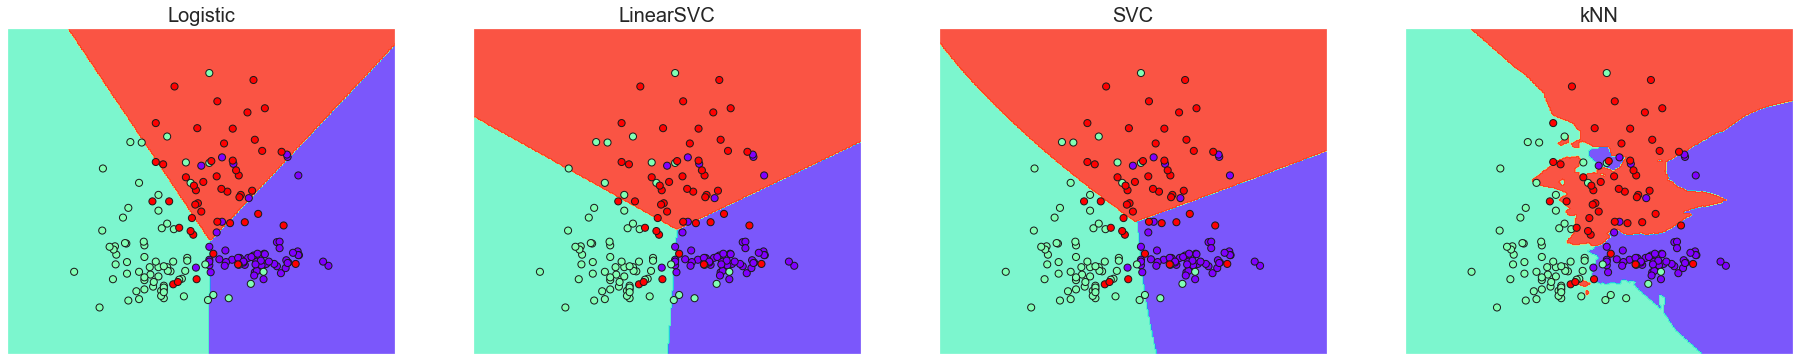

In [98]:
plot_4_classifiers(X, y, classifiers)